## EDUARDO: sobre el notebook que me enviaste y que empezaba así,
## yo fui a buscar el punto de partida para hacer mi kmeans en la celda 48 (clean_df).

## Hypothesis Testing

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')

In [2]:
pd.get_option("display.max_rows")

60

In [3]:
# Groupby of all sold transactions
soldGroupby_df=pd.read_csv('punks_Soldgroupby.csv')
soldGroupby_df

,tipus,skin,traits_count,Sold_count,profit
0,Alien,Alien-skinned,1,2,7577873.0
1,Alien,Alien-skinned,3,2,7555012.0
2,Ape,Ape-skinned,1,2,3986.0
3,Ape,Ape-skinned,1,3,69965.0
4,Ape,Ape-skinned,1,4,1536975.0
...,...,...,...,...,...
336,Zombie,Zombie-skinned,3,2,2800000.0
337,Zombie,Zombie-skinned,3,3,769590.0
338,Zombie,Zombie-skinned,3,4,781457.0
339,Zombie,Zombie-skinned,3,7,1987800.0


In [4]:
# Dataframe with all sold transactions 
orderProfits_df=pd.read_csv('order_profits_df.csv')
orderProfits_df.drop(orderProfits_df.columns[[0]], axis=1, inplace=True)
orderProfits_df.head()

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH,Sold_count,profit,profit_pcent
0,22,0xe08c32,Sold,0,0xf5099e,0xe08c32,25.00,2822.0,2018-11-30,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,113.77,3,2436.0,6.310881
1,30,0xa0a59c,Sold,0,0x00d7c9,0xa0a59c,1.60,386.0,2017-07-07,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,238.38,3,66.0,0.206250
2,37,0x00d7c9,Sold,0,0xc352b5,0x00d7c9,0.98,320.0,2017-06-23,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,324.37,3,320.0,0.000000
3,52,0xcf6165,Sold,1,EliteCat…,0xcf6165,60.00,36305.0,2020-11-30,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,615.92,3,31150.0,6.042677
4,78,GoWest23,Sold,1,0xf5099e,GoWest23,31.00,5155.0,2019-04-06,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,165.55,3,5048.0,47.177570


In [5]:
orderProfits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18425 entries, 0 to 18424
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idTransaction     18425 non-null  int64  
 1   idPropietario     18425 non-null  object 
 2   TypeTransaction   18425 non-null  object 
 3   idCryptoPunk      18425 non-null  int64  
 4   TransactionOwner  18425 non-null  object 
 5   Reciever          18425 non-null  object 
 6   AmountETH         18425 non-null  float64
 7   AmountDollar      18425 non-null  float64
 8   Date              18425 non-null  object 
 9   rarity_rank       18425 non-null  int64  
 10  tipus             18425 non-null  object 
 11  skin              18425 non-null  object 
 12  traits            18425 non-null  object 
 13  traits_count      18425 non-null  int64  
 14  CurrentOwner      18425 non-null  object 
 15  priceETH          18425 non-null  float64
 16  Sold_count        18425 non-null  int64 

In [6]:
lastOrders_df=pd.read_csv('last_orders_df.csv')
lastOrders_df.drop(lastOrders_df.columns[[0]], axis=1, inplace=True)
lastOrders_df.head()

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH,Sold_count,profit,profit_pcent
0,22,0xe08c32,Sold,0,0xf5099e,0xe08c32,25.00,2822.0,2018-11-30,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,113.77,3,2436.0,6.310881
1,52,0xcf6165,Sold,1,EliteCat…,0xcf6165,60.00,36305.0,2020-11-30,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,615.92,3,31150.0,6.042677
2,300,0x7c00c9…,Sold,14,0x582fa7,0x7c00c9…,2.50,234.0,2018-12-07,155,Female,Dark-skinned,"Hot Lipstick, Pilot Helmet, Pipe",3,0x7C00c9,93.27,3,-117.0,-0.333333
3,411,0x6611fe,Sold,33,0xc352b5,0x6611fe,0.51,105.0,2017-07-10,7635,Male,Light-skinned,Peak Spike,1,0x6611fE,202.00,1,105.0,0.000000
4,492,0xe20388,Sold,53,0xb813c6,0xe20388,129.99,432676.0,2021-08-23,2825,Female,Light-skinned,"Big Shades, Straight Hair",2,0xe20388,3319.49,3,389873.0,9.108544


In [7]:
# Exclude first transactions of all punks
lastOrders_df=lastOrders_df[lastOrders_df.profit_pcent!=0]
lastOrders_df.head()

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH,Sold_count,profit,profit_pcent
0,22,0xe08c32,Sold,0,0xf5099e,0xe08c32,25.00,2822.0,2018-11-30,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,113.77,3,2436.0,6.310881
1,52,0xcf6165,Sold,1,EliteCat…,0xcf6165,60.00,36305.0,2020-11-30,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,615.92,3,31150.0,6.042677
2,300,0x7c00c9…,Sold,14,0x582fa7,0x7c00c9…,2.50,234.0,2018-12-07,155,Female,Dark-skinned,"Hot Lipstick, Pilot Helmet, Pipe",3,0x7C00c9,93.27,3,-117.0,-0.333333
4,492,0xe20388,Sold,53,0xb813c6,0xe20388,129.99,432676.0,2021-08-23,2825,Female,Light-skinned,"Big Shades, Straight Hair",2,0xe20388,3319.49,3,389873.0,9.108544
5,732,TokenAng…,Sold,89,jmg,TokenAng…,19.99,6898.0,2020-09-06,125,Female,Dark-skinned,Choker,1,0x78f026,353.49,3,2760.0,0.666989


In [8]:
lastOrders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4263 entries, 0 to 6342
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idTransaction     4263 non-null   int64  
 1   idPropietario     4263 non-null   object 
 2   TypeTransaction   4263 non-null   object 
 3   idCryptoPunk      4263 non-null   int64  
 4   TransactionOwner  4263 non-null   object 
 5   Reciever          4263 non-null   object 
 6   AmountETH         4263 non-null   float64
 7   AmountDollar      4263 non-null   float64
 8   Date              4263 non-null   object 
 9   rarity_rank       4263 non-null   int64  
 10  tipus             4263 non-null   object 
 11  skin              4263 non-null   object 
 12  traits            4263 non-null   object 
 13  traits_count      4263 non-null   int64  
 14  CurrentOwner      4263 non-null   object 
 15  priceETH          4263 non-null   float64
 16  Sold_count        4263 non-null   int64  


In [9]:
lastOrders_df.nunique()

idTransaction       4263
idPropietario       2250
TypeTransaction        1
idCryptoPunk        4263
TransactionOwner    1511
Reciever            2250
AmountETH           1340
AmountDollar        3771
Date                 577
rarity_rank         4263
tipus                  5
skin                   7
traits              3428
traits_count           9
CurrentOwner        2197
priceETH             574
Sold_count            17
profit              3948
profit_pcent        4075
dtype: int64

In [10]:
lastOrders_df.duplicated().sum()

0

In [11]:
lastOrders_df.isnull().sum()

idTransaction        0
idPropietario        0
TypeTransaction      0
idCryptoPunk         0
TransactionOwner     0
Reciever             0
AmountETH            0
AmountDollar         0
Date                 0
rarity_rank          0
tipus                0
skin                 0
traits               0
traits_count         0
CurrentOwner         0
priceETH             0
Sold_count           0
profit               0
profit_pcent        16
dtype: int64

In [12]:
lastOrders_df[lastOrders_df.isna().any(axis=1)].head()

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH,Sold_count,profit,profit_pcent
73,3426,0x269616,Sold,402,0x0b8ee2,0x269616,0.0,0.0,2021-07-25,5129,Male,Dark-skinned,"Front Beard Dark, Mohawk Thin",2,0x269616,2189.79,5,0.0,NaN
492,15178,0x269616,Sold,1417,0xaf93fc,0x269616,0.0,0.0,2021-07-30,9766,Female,Dark-skinned,"Classic Shades, Stringy Hair",2,0x269616,2460.95,6,0.0,NaN
502,15471,0x269616,Sold,1436,0xaf93fc,0x269616,0.0,0.0,2021-08-02,9272,Male,Dark-skinned,"Mohawk, Mole",2,0x269616,2608.04,10,0.0,NaN
1389,36930,0x269616,Sold,2791,ryley-to…,0x269616,0.0,0.0,2021-07-21,5578,Male,Dark-skinned,"Handlebars, Mohawk Thin",2,0x269616,1994.49,5,0.0,NaN
1649,43161,0x269616,Sold,3143,ryley-to…,0x269616,0.0,0.0,2021-07-21,5479,Male,Dark-skinned,"Earring, Handlebars, Shaved Head",3,0x269616,1994.49,7,0.0,NaN


The are "Sold:" with zero value. These operations are consired atypical and will be excluded from the dataframe after. They can be considered "Transfer"

In [13]:
lastOrders_df[lastOrders_df.isin([np.nan, np.inf, -np.inf]).any(1)]

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH,Sold_count,profit,profit_pcent
73,3426,0x269616,Sold,402,0x0b8ee2,0x269616,0.00,0.0,2021-07-25,5129,Male,Dark-skinned,"Front Beard Dark, Mohawk Thin",2,0x269616,2189.79,5,0.0,NaN
167,6206,sriramk.…,Sold,639,0xc72aed,sriramk.…,148.00,477756.0,2021-08-28,7787,Male,Dark-skinned,"Mole, Peak Spike, Shadow Beard",3,0xC72AED,3243.90,11,477756.0,inf
207,7535,0xbb67d2,Sold,759,honeysuc…,0xbb67d2,41.99,126583.0,2021-08-18,2987,Female,Dark-skinned,"Dark Hair, Purple Eye Shadow",2,0xbb67D2,3016.91,5,126583.0,inf
477,14811,0xef768e,Sold,1392,0x1919db,0xef768e,143.98,471470.0,2021-08-29,9768,Female,Light-skinned,"Classic Shades, Stringy Hair",2,0x269616,3222.16,6,471470.0,inf
490,15093,0x6ef237,Sold,1413,ryley-to…,0x6ef237,20.40,41220.0,2021-07-22,9428,Female,Dark-skinned,"Black Lipstick, Cigarette, Frumpy Hair",3,0x9df947,2024.58,7,41220.0,inf
492,15178,0x269616,Sold,1417,0xaf93fc,0x269616,0.00,0.0,2021-07-30,9766,Female,Dark-skinned,"Classic Shades, Stringy Hair",2,0x269616,2460.95,6,0.0,NaN
502,15471,0x269616,Sold,1436,0xaf93fc,0x269616,0.00,0.0,2021-08-02,9272,Male,Dark-skinned,"Mohawk, Mole",2,0x269616,2608.04,10,0.0,NaN
655,19237,0x38c6ce,Sold,1691,0x0478fa,0x38c6ce,100.00,310795.0,2021-08-27,2780,Female,Light-skinned,"Black Lipstick, Clown Eyes Green, Straight Hair",3,0x269616,3273.58,5,310795.0,inf
1166,31729,0xc585d3,Sold,2480,0x54b174,0xc585d3,103.97,408516.0,2021-09-03,5913,Male,Dark-skinned,"Mohawk Dark, Vape",2,0x269616,3936.29,6,408516.0,inf
1389,36930,0x269616,Sold,2791,ryley-to…,0x269616,0.00,0.0,2021-07-21,5578,Male,Dark-skinned,"Handlebars, Mohawk Thin",2,0x269616,1994.49,5,0.0,NaN


In [14]:
punks_Soldgroupby=pd.DataFrame(orderProfits_df[(orderProfits_df.profit_pcent!=0)].groupby(["tipus","skin","traits_count","Sold_count"])["profit"].max())
punks_Soldgroupby

profit
tipus  skin           traits_count Sold_count           
Alien  Alien-skinned  1            2           7577873.0
                      3            2           7555012.0
Ape    Ape-skinned    1            2              3986.0
                                   3             69965.0
                                   4           1536975.0
...                                                  ...
Zombie Zombie-skinned 3            2           2800000.0
                                   3            769590.0
                                   4            781457.0
                                   7           1987800.0
                      4            3           1360930.0

[341 rows x 1 columns]

In [15]:
lastOrders_df.columns

Index(['idTransaction', 'idPropietario', 'TypeTransaction', 'idCryptoPunk',
       'TransactionOwner', 'Reciever', 'AmountETH', 'AmountDollar', 'Date',
       'rarity_rank', 'tipus', 'skin', 'traits', 'traits_count',
       'CurrentOwner', 'priceETH', 'Sold_count', 'profit', 'profit_pcent'],
      dtype='object')

In [16]:
# Filter just Male, Female and traits_count = 1,2,3,4,5
#newdf = df[df.origin.isin(["JFK", "LGA"])]
#newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]
samplePunks_df=lastOrders_df[(lastOrders_df.tipus.isin(['Male','Female'])) & (lastOrders_df.traits_count.isin([1,2,3,4,5]))]

In [17]:
samplePunks_df

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,TransactionOwner,Reciever,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,CurrentOwner,priceETH,Sold_count,profit,profit_pcent
0,22,0xe08c32,Sold,0,0xf5099e,0xe08c32,25.00,2822.0,2018-11-30,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,0xE08c32,113.77,3,2436.0,6.310881
1,52,0xcf6165,Sold,1,EliteCat…,0xcf6165,60.00,36305.0,2020-11-30,4352,Male,Dark-skinned,"Mohawk, Smile",2,0xB88F61,615.92,3,31150.0,6.042677
2,300,0x7c00c9…,Sold,14,0x582fa7,0x7c00c9…,2.50,234.0,2018-12-07,155,Female,Dark-skinned,"Hot Lipstick, Pilot Helmet, Pipe",3,0x7C00c9,93.27,3,-117.0,-0.333333
4,492,0xe20388,Sold,53,0xb813c6,0xe20388,129.99,432676.0,2021-08-23,2825,Female,Light-skinned,"Big Shades, Straight Hair",2,0xe20388,3319.49,3,389873.0,9.108544
5,732,TokenAng…,Sold,89,jmg,TokenAng…,19.99,6898.0,2020-09-06,125,Female,Dark-skinned,Choker,1,0x78f026,353.49,3,2760.0,0.666989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,161024,0x7c00c9…,Sold,9976,0x0553de,0x7c00c9…,1.50,216.0,2020-01-10,2139,Female,Light-skinned,"Half Shaved, Pipe",2,0x7C00c9,144.81,3,160.0,2.857143
6336,161049,0xb166dd,Sold,9979,niwin,0xb166dd,6.20,7744.0,2021-01-27,7564,Male,Light-skinned,"Cigarette, Earring, Nerd Glasses, Shaved Head",4,0x1d337f,1247.62,3,5920.0,3.245614
6337,161064,0xfad116,Sold,9980,0xb5e6ac,0xfad116,55.00,182376.0,2021-08-14,1159,Female,Mid-skinned,"Black Lipstick, Blonde Short, Cigarette, Class...",4,0xfad116,3264.69,6,97412.0,1.146509
6340,161165,0x3689df,Sold,9990,0xddfdcb,0x3689df,0.01,0.0,2021-08-15,9186,Male,Albino-skinned,"Horned Rim Glasses, Mohawk",2,0x3689Df,3308.87,2,-44981.0,-1.000000


In [18]:
samplePunks_df.tipus.value_counts()

Male      2767
Female    1428
Name: tipus, dtype: int64

In [19]:
samplePunks_df.traits_count.value_counts()

3    1918
2    1485
4     582
5     151
1      59
Name: traits_count, dtype: int64

In [20]:
# Hypothesis Testing - Liquid Punks ("Sold_count">7) - Only last sold transctions of each punk
# Ho = The mean value of all sold cryptopunks are the same.
# H1 = The mean value of all sold cryptopunks are the same is not the same.
import scipy.stats as stats
from scipy.stats import ttest_1samp

liquidPunks_df=samplePunks_df[samplePunks_df.Sold_count>7]


stat, p = stats.ttest_ind(lastOrders_df['AmountDollar'], liquidPunks_df['AmountDollar'])
print('stat =%.3f, p =%.15f' % (stat, p))
if p < 0.025:
    print("Null hypothesis rejected.")
else:
    print("Null hypothesis accepted.")

stat =-1.662, p =0.096553846666906
Null hypothesis accepted.


In [21]:
# Hypothesis Testing - Liquid Punks ("Sold_count">7) - All sold transactions
# Ho = The mean value of all sold cryptopunks are the same.
# H1 = The mean value of all sold cryptopunks are the same is not the same.
import scipy.stats as stats
from scipy.stats import ttest_1samp

allLiquidPunks_df=orderProfits_df[orderProfits_df.Sold_count>7]


stat, p = stats.ttest_ind(orderProfits_df['AmountDollar'], allLiquidPunks_df['AmountDollar'])
print('stat =%.3f, p =%.15f' % (stat, p))
if p < 0.025:
    print("Null hypothesis rejected.")
else:
    print("Null hypothesis accepted.")

stat =5.424, p =0.000000058937503
Null hypothesis rejected.


In [22]:
# Hypothesis Testing - Male and Female - All sold transactions
# Ho = The mean value of all sold cryptopunks are the same.
# H1 = The mean value of all sold cryptopunks are the same is not the same.
import scipy.stats as stats
from scipy.stats import ttest_1samp

allMaleFemale_df=orderProfits_df[orderProfits_df.tipus.isin(['Male','Female'])]


stat, p = stats.ttest_ind(orderProfits_df['AmountDollar'], allMaleFemale_df['AmountDollar'])
print('stat =%.3f, p =%.15f' % (stat, p))
if p < 0.025:
    print("Null hypothesis rejected.")
else:
    print("Null hypothesis accepted.")

stat =2.383, p =0.017189685779681
Null hypothesis rejected.


In [23]:
# ANOVA - Analysis of Variance Test
# Male and Female - All sold transactions

from scipy.stats import f_oneway

data1 = orderProfits_df['AmountDollar']
data2 = allMaleFemale_df['AmountDollar']

stat, p = f_oneway(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=5.677, p=0.017
Probably different distributions


In [24]:
# ANOVA - Male and Female - Only last sold transctions of each punk

from scipy.stats import f_oneway

maleFemale_df=samplePunks_df[samplePunks_df.tipus.isin(['Male','Female'])]

data1 = samplePunks_df['AmountDollar']
data2 = maleFemale_df['AmountDollar']

stat, p = f_oneway(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.000, p=nan
Probably different distributions


In [25]:
orderProfits_df.columns

Index(['idTransaction', 'idPropietario', 'TypeTransaction', 'idCryptoPunk',
       'TransactionOwner', 'Reciever', 'AmountETH', 'AmountDollar', 'Date',
       'rarity_rank', 'tipus', 'skin', 'traits', 'traits_count',
       'CurrentOwner', 'priceETH', 'Sold_count', 'profit', 'profit_pcent'],
      dtype='object')

In [26]:
orderProfits_df.skin.value_counts()

Dark-skinned      5880
Mid-skinned       5468
Light-skinned     5292
Albino-skinned    1638
Zombie-skinned     104
Ape-skinned         33
Alien-skinned       10
Name: skin, dtype: int64

In [27]:
# ANOVA - Male and Female - Only last sold transctions of each punk

from scipy.stats import f_oneway

traits_df=orderProfits_df[orderProfits_df.traits_count.isin([1,2,3,4,5])&orderProfits_df.tipus.isin(['Male','Female'])]
maleFemale_df=orderProfits_df[orderProfits_df.tipus.isin(['Male','Female'])]
skinDark_df=orderProfits_df[orderProfits_df.skin.isin(['Dark-skinned'])&orderProfits_df.tipus.isin(['Male','Female'])]
skinMid_df=orderProfits_df[orderProfits_df.skin.isin(['Mid-skinned']&orderProfits_df.tipus.isin(['Male','Female']))]
skinLight_df=orderProfits_df[orderProfits_df.skin.isin(['Light-skinned']&orderProfits_df.tipus.isin(['Male','Female']))]
skinAlbino_df=orderProfits_df[orderProfits_df.skin.isin(['Albino']&orderProfits_df.tipus.isin(['Male','Female']))]

data1 = maleFemale_df['AmountDollar']
#data2 = traits_df['AmountDollar']
data3 = skinDark_df['AmountDollar']
#data4 = skinMid_df['AmountDollar']
#data5 = skinLight_df['AmountDollar']
#data6 = skinAlbino_df['AmountDollar']
stat, p = f_oneway(data1, data3)#, data3, data4, data5, data6)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
# Only Dark-Skinned has the same distribution os Males and Females

stat=0.106, p=0.745
Probably the same distribution


In [28]:
samplePunks_df.skin.value_counts()

Dark-skinned      1281
Light-skinned     1281
Mid-skinned       1260
Albino-skinned     373
Name: skin, dtype: int64

In [29]:
# Punks_soldCount_df[(Punks_soldCount_df.rarity_rank<500)&(Punks_soldCount_df.Sold_count>3)].groupby(["tipus","skin","traits_count"])["AmountDollar"].mean()

## Machine Learning

#####  Prepocessing data

In [30]:
# Dataframe with only the last operations of each punk
samplePunks_df.duplicated().sum()

0

In [31]:
samplePunks_df.isnull().sum()

idTransaction        0
idPropietario        0
TypeTransaction      0
idCryptoPunk         0
TransactionOwner     0
Reciever             0
AmountETH            0
AmountDollar         0
Date                 0
rarity_rank          0
tipus                0
skin                 0
traits               0
traits_count         0
CurrentOwner         0
priceETH             0
Sold_count           0
profit               0
profit_pcent        16
dtype: int64

In [32]:
samplePunks_df.columns

Index(['idTransaction', 'idPropietario', 'TypeTransaction', 'idCryptoPunk',
       'TransactionOwner', 'Reciever', 'AmountETH', 'AmountDollar', 'Date',
       'rarity_rank', 'tipus', 'skin', 'traits', 'traits_count',
       'CurrentOwner', 'priceETH', 'Sold_count', 'profit', 'profit_pcent'],
      dtype='object')

In [33]:
# Drop some columns that does not affect the price of cryptopunk or are not consisered in our study: 

mLearning_df = samplePunks_df.copy()
mLearning_df = mLearning_df.drop(['idPropietario','TypeTransaction','TransactionOwner','Reciever','CurrentOwner','priceETH'], 1)
mLearning_df.head(1)

,idTransaction,idCryptoPunk,AmountETH,AmountDollar,Date,rarity_rank,tipus,skin,traits,traits_count,Sold_count,profit,profit_pcent
0,22,0,25.0,2822.0,2018-11-30,2023,Female,Mid-skinned,"Blonde Bob, Earring, Green Eye Shadow, Hidden ...",4,3,2436.0,6.310881


In [34]:
mLearning_df.Sold_count.value_counts()

2     1429
3      946
4      651
5      422
6      278
7      173
8      117
9       58
10      50
11      28
12      19
13      11
15       4
14       4
17       3
16       1
21       1
Name: Sold_count, dtype: int64

In [35]:
mLearning_df.columns

Index(['idTransaction', 'idCryptoPunk', 'AmountETH', 'AmountDollar', 'Date',
       'rarity_rank', 'tipus', 'skin', 'traits', 'traits_count', 'Sold_count',
       'profit', 'profit_pcent'],
      dtype='object')

In [36]:
# Now the relevant coluns will be filtered

filtered_columns = ['idCryptoPunk','tipus', 'skin', 'traits_count', 'profit_pcent']
filtered_df = mLearning_df[filtered_columns]
filtered_df.head(1)

,idCryptoPunk,tipus,skin,traits_count,profit_pcent
0,0,Female,Mid-skinned,4,6.310881


In [37]:
# The categorical features will que transformed with OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(filtered_df)


encoder = OneHotEncoder(sparse=False)

data_categorical = filtered_df[categorical_columns]

data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded, index=filtered_df.index)
result.head()

,tipus_Female,tipus_Male,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
categorical_columns

['tipus', 'skin']

In [39]:
united_df = filtered_df.join(result)
united_df.head()

,idCryptoPunk,tipus,skin,traits_count,profit_pcent,tipus_Female,tipus_Male,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned
0,0,Female,Mid-skinned,4,6.310881,1.0,0.0,0.0,0.0,0.0,1.0
1,1,Male,Dark-skinned,2,6.042677,0.0,1.0,0.0,1.0,0.0,0.0
2,14,Female,Dark-skinned,3,-0.333333,1.0,0.0,0.0,1.0,0.0,0.0
4,53,Female,Light-skinned,2,9.108544,1.0,0.0,0.0,0.0,1.0,0.0
5,89,Female,Dark-skinned,1,0.666989,1.0,0.0,0.0,1.0,0.0,0.0


In [40]:
united_df = united_df.drop(['tipus','skin'], 1)
united_df.head(1)

,idCryptoPunk,traits_count,profit_pcent,tipus_Female,tipus_Male,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned
0,0,4,6.310881,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
united_df.isnull().sum()

idCryptoPunk            0
traits_count            0
profit_pcent           16
tipus_Female            0
tipus_Male              0
skin_Albino-skinned     0
skin_Dark-skinned       0
skin_Light-skinned      0
skin_Mid-skinned        0
dtype: int64

In [42]:
united_df[united_df.isna().any(axis=1)]

,idCryptoPunk,traits_count,profit_pcent,tipus_Female,tipus_Male,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned
73,402,2,NaN,0.0,1.0,0.0,1.0,0.0,0.0
492,1417,2,NaN,1.0,0.0,0.0,1.0,0.0,0.0
502,1436,2,NaN,0.0,1.0,0.0,1.0,0.0,0.0
1389,2791,2,NaN,0.0,1.0,0.0,1.0,0.0,0.0
1649,3143,3,NaN,0.0,1.0,0.0,1.0,0.0,0.0
2140,3789,3,NaN,1.0,0.0,0.0,1.0,0.0,0.0
2628,4493,2,NaN,0.0,1.0,0.0,1.0,0.0,0.0
2882,4933,3,NaN,0.0,1.0,0.0,0.0,0.0,1.0
3469,5821,3,NaN,1.0,0.0,0.0,0.0,0.0,1.0
3803,6276,2,NaN,0.0,1.0,0.0,1.0,0.0,0.0


In [43]:
# The are "Sold:" with zero value. 
#These operations are consired atypical and will be excluded from the dataframe after. 
# They are considered "Transfer" transaccions by the team

united_df.dropna(inplace=True)

In [44]:
united_df.isnull().sum()

idCryptoPunk           0
traits_count           0
profit_pcent           0
tipus_Female           0
tipus_Male             0
skin_Albino-skinned    0
skin_Dark-skinned      0
skin_Light-skinned     0
skin_Mid-skinned       0
dtype: int64

In [45]:
united_df[united_df.isin([np.nan, np.inf, -np.inf]).any(1)]

,idCryptoPunk,traits_count,profit_pcent,tipus_Female,tipus_Male,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned
167,639,3,inf,0.0,1.0,0.0,1.0,0.0,0.0
207,759,2,inf,1.0,0.0,0.0,1.0,0.0,0.0
477,1392,2,inf,1.0,0.0,0.0,0.0,1.0,0.0
490,1413,3,inf,1.0,0.0,0.0,1.0,0.0,0.0
655,1691,3,inf,1.0,0.0,0.0,0.0,1.0,0.0
1166,2480,2,inf,0.0,1.0,0.0,1.0,0.0,0.0
1622,3107,3,inf,0.0,1.0,0.0,1.0,0.0,0.0
1864,3420,2,inf,1.0,0.0,0.0,0.0,1.0,0.0
1965,3553,2,inf,0.0,1.0,0.0,0.0,0.0,1.0
2208,3878,3,inf,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
clean_df = united_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
clean_df[clean_df.isin([np.nan, np.inf, -np.inf]).any(1)]

,idCryptoPunk,traits_count,profit_pcent,tipus_Female,tipus_Male,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned


In [47]:
clean_df.isnull().sum()

idCryptoPunk           0
traits_count           0
profit_pcent           0
tipus_Female           0
tipus_Male             0
skin_Albino-skinned    0
skin_Dark-skinned      0
skin_Light-skinned     0
skin_Mid-skinned       0
dtype: int64

In [48]:
clean_df.columns

Index(['idCryptoPunk', 'traits_count', 'profit_pcent', 'tipus_Female',
       'tipus_Male', 'skin_Albino-skinned', 'skin_Dark-skinned',
       'skin_Light-skinned', 'skin_Mid-skinned'],
      dtype='object')

## AQUÍ EMPIEZA LO MÍO DE KMEANS

+*Per un millor funcionament de l'algorisme, és molt convenient escalar les dades numèriques. En aquest cas fem un feature scaling d'estandarització amb "StandardScaler()"; que farà que les dades quedin escalades perquè cada variable tingui una mean = 0, i una desviació standard = 1*

In [49]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [50]:
sscaler = StandardScaler()
clean_df[['traits_count', 'profit_pcent']] = sscaler.fit_transform(clean_df[['traits_count', 'profit_pcent']])

In [51]:
clean_df

,idCryptoPunk,traits_count,profit_pcent,tipus_Female,tipus_Male,skin_Albino-skinned,skin_Dark-skinned,skin_Light-skinned,skin_Mid-skinned
0,0,1.436675,-0.037022,1.0,0.0,0.0,0.0,0.0,1.0
1,1,-1.017324,-0.037024,0.0,1.0,0.0,1.0,0.0,0.0
2,14,0.209675,-0.037064,1.0,0.0,0.0,1.0,0.0,0.0
4,53,-1.017324,-0.037005,1.0,0.0,0.0,0.0,1.0,0.0
5,89,-2.244324,-0.037057,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6335,9976,-1.017324,-0.037044,1.0,0.0,0.0,0.0,1.0,0.0
6336,9979,1.436675,-0.037041,0.0,1.0,0.0,0.0,1.0,0.0
6337,9980,1.436675,-0.037054,1.0,0.0,0.0,0.0,0.0,1.0
6340,9990,-1.017324,-0.037068,0.0,1.0,1.0,0.0,0.0,0.0


Comprovem que les variables han quedat standaritzades adeqüadament.Mean = 0 i std. dev. = 1

In [52]:
# Para poder guardar dataframe como file_name.png
import dataframe_image as dfi
dfi.export(clean_df, 'clean_df.png', max_rows = 10)

In [53]:
clean_df['traits_count'].mean()

-8.172963390661123e-15

In [54]:
clean_df['traits_count'].std()

1.0001205327552258

In [55]:
clean_df['profit_pcent'].mean()

-2.8464684079175952e-18

In [56]:
clean_df['profit_pcent'].std()

1.000120532755215

##### K-Means Clustering

+ *Preparació de les dades per alimentar el KMeans

In [57]:
X = np.array(clean_df[['traits_count', 'profit_pcent', 'tipus_Female',
       'tipus_Male', 'skin_Albino-skinned', 'skin_Dark-skinned',
       'skin_Light-skinned', 'skin_Mid-skinned']])
#y = np.array(clean_df['xxxxxx'])
X.shape

(4149, 8)

In [58]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [59]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Generem una llista on incloure els valors de SSE per cada k (número de Clusters)
sse = []
for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

print(sse)

[9083.52306639049, 5328.437006650224, 5032.976802962093, 3909.1681616233823, 3632.597859917119]


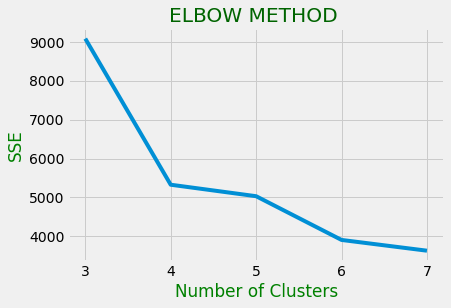

In [60]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(3, 8), sse)
 plt.xticks(range(3, 8))
 plt.title("ELBOW METHOD ", color = 'Darkgreen')
 plt.xlabel("Number of Clusters", color = 'green')
 plt.ylabel("SSE", color = 'green')
 
 plt.savefig('elbowmethod.png', bbox_inches ="tight", dpi = 300)
 plt.show()

In [61]:
kl = KneeLocator(range(3, 8), sse, curve="convex", direction="decreasing")
kl.elbow

4

In [62]:
# Silhouette coefficient

silhouette_coefficients = []

for k in range(3, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients   

[0.31690786035894397,
 0.30687088830852144,
 0.27445078725052474,
 0.3480417533433786,
 0.3679832644372025]

In [63]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-4.65695601e-01 -3.55465793e-02  1.11022302e-16  1.00000000e+00
   1.10934183e-01  3.66772824e-01  1.59766454e-01  3.62526539e-01]
 [ 2.09675310e-01  2.82217474e+01  2.00000000e-01  8.00000000e-01
   0.00000000e+00  4.00000000e-01  2.00000000e-01  4.00000000e-01]
 [-3.74406549e-01 -3.60384704e-02  1.00000000e+00 -9.99200722e-16
   9.32868352e-02  3.06015693e-01  2.91194420e-01  3.09503051e-01]
 [ 1.17319537e+00 -2.94724675e-02  2.35399820e-01  7.64600180e-01
   5.03144654e-02  1.90476190e-01  5.71428571e-01  1.87780773e-01]]


In [64]:
# Número de iteracions per convergir al resultat final
kmeans.n_iter_

5

In [65]:
kmeans.labels_[:50]

array([3, 0, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 0, 0, 2, 0,
       0, 0, 3, 0, 0, 0, 2, 2, 0, 2, 0, 3, 2, 2, 0, 2, 0, 0, 3, 3, 2, 2,
       2, 2, 3, 0, 2, 2])

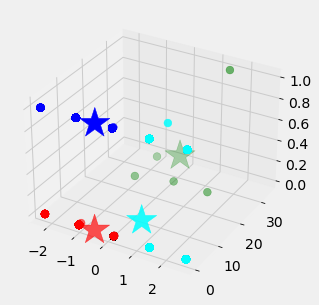

In [66]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60);
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);
plt.savefig('pca3d.png', bbox_inches ="tight", dpi = 300)

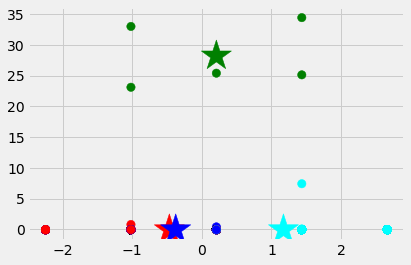

In [67]:
# Getting the values and plotting it
f1 = clean_df['traits_count'].values
f2 = clean_df['profit_pcent'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

+ *Comprovem quants clusters hi ha*

In [68]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

+ *Comprovem quantes observacions queden assignades a cada cluster*

In [69]:
import collections
counter = collections.Counter(kmeans.labels_)
print(counter)

Counter({0: 1884, 2: 1147, 3: 1113, 1: 5})


In [70]:
kmeans_silhouette = silhouette_score(X
      , kmeans.labels_
    ).round(2)
kmeans_silhouette

0.3

In [71]:
from sklearn.metrics import pairwise_distances_argmin_min

In [72]:
#vemos el representante del grupo, el usuario más cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 279, 2410, 2890, 3997], dtype=int64)

In [73]:
users=clean_df['idCryptoPunk'].values
for row in closest:
    print(users[row])

1338
6171
7200
9651


In [74]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [75]:
values = [1338, 501, 6982, 6171]
result_df = filtered_df[filtered_df['idCryptoPunk'].isin(values)]
result_df 

,idCryptoPunk,tipus,skin,traits_count,profit_pcent
108,501,Female,Mid-skinned,3,1765.18
446,1338,Male,Dark-skinned,2,250.35
3738,6171,Male,Mid-skinned,3,4086599.00
4283,6982,Male,Light-skinned,3,167.61


In [76]:
# Para poder guardar dataframe como file_name.png
import dataframe_image as dfi
dfi.export(result_df, 'result_df.png', max_rows = 10)

I fem una reducció de dimensions amb PCA per visualitzar els clusters generats d'acord amb els 2 components principals que definim

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(2)

In [79]:
#Transformem les dades
df = pca.fit_transform(X)
 
df.shape

(4149, 2)

In [80]:
#explained_variance_ratio_ returns the percentage of variance explained by each of the selected components
print(pca.explained_variance_ratio_)

[0.31947731 0.31284856]


In [81]:
#Fem una predicció dels valors d'assignació als diferents clusters
label = kmeans.fit_predict(df)
 
print(label)

[1 0 3 ... 1 0 3]


In [82]:
np.unique(label)

array([0, 1, 2, 3])

In [83]:
kmeans_silhouette = silhouette_score(df
      , kmeans.labels_
    ).round(2)

In [84]:
kmeans_silhouette

0.92

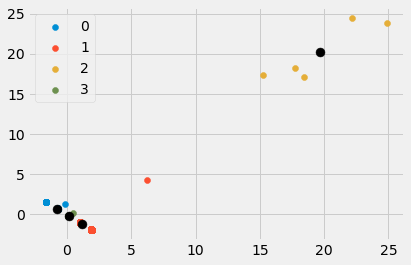

In [85]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [86]:
counter2 = collections.Counter(kmeans.labels_)

In [87]:
print(counter2)

Counter({3: 1895, 0: 1524, 1: 725, 2: 5})


In [88]:
#vemos el representante del grupo, el usuario más cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)
closest

array([1514, 3111, 2410, 4011], dtype=int64)

In [89]:
users=clean_df['idCryptoPunk'].values
for row in closest:
    print(users[row])

4077
7714
6171
9669


In [90]:
values = [1424, 6024, 6171, 7266]
result_df2 = filtered_df[filtered_df['idCryptoPunk'].isin(values)]
result_df2

,idCryptoPunk,tipus,skin,traits_count,profit_pcent
496,1424,Male,Mid-skinned,4,2054.71
3630,6024,Male,Albino-skinned,3,1251.30
3738,6171,Male,Mid-skinned,3,4086599.00
4469,7266,Female,Albino-skinned,3,899.93


In [91]:
# Para poder guardar dataframe como file_name.png
import dataframe_image as dfi
dfi.export(result_df2, 'result_df2.png', max_rows = 10)